
<div class="col-md-8" style="line-height: 0.5">
<table style="font-size: 15px"  >
<tr >
 <th scope="row"  >Name and Surname:</th>
<td >imen turki</td>
</tr>
<tr >
<th scope="row">Dataset source (web address): </th>
<td >https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset</td>
</tr>  
<tr >
<th scope="row" "width:150px " >Aim of the project: </th>
<td >According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
    (beyine giden kan kesilmesesinden dolayı felç)</td>
</tr> 
</table>
    </div>

## Step0:  Project Proposal

#### data mining approaches :
- decision tree: can predict whether the patient had a Stroke or not. This can help the doctor or the hospital to give a faster and more precise treatment to the patient
- Naive Bayes: is applied to map the symptoms with potential diseases based on a database of multiple disease symptoms records. This system not only makes doctors' jobs easier, but it also benefits patients by getting them the care they need as soon as possible.

#### Attribute Information
- id: unique identifier (categorical)
- gender: "Male", "Female" or "Other" (categorical)
- age: age of the patient (categorical)
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension (categorical)
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease (categorical)
- ever_married: "No" or "Yes" (categorical)
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (categorical)
- Residence_type: "Rural" or "Urban" (categorical)
- avg_glucose_level: average glucose level in blood (numerical)
- bmi: body mass index (numerical)
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* (categorical)
- stroke: 1 if the patient had a stroke or 0 if not 
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [44]:
import pandas as pd
import random as rnd
import numpy as np
import math

rnd.seed(42)

In [45]:
# CSV (Comma Seperated Value) dosya tipindeki veri setini okuma
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [46]:
data.head(50)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


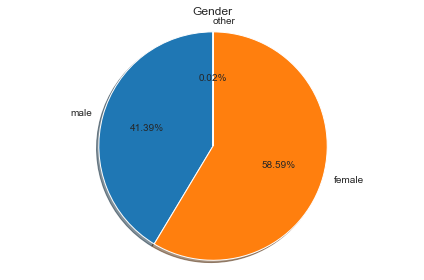

In [47]:
import matplotlib.pyplot as plt


labels = ['male', 'female','other']
genderCount= data['gender'].value_counts()
maleperc='{:.2f}'.format(genderCount["Male"]/data['gender'].count()*100)
femaleperc='{:.2f}'.format(genderCount["Female"]/data['gender'].count()*100)
otherperc='{:.2f}'.format(genderCount["Other"]/data['gender'].count()*100)

sizes = [maleperc, femaleperc, otherperc]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

ax1.set_title("Gender")
plt.tight_layout()
plt.show()

58.59% of the patients are female, 41.39% are male, and 0.02% are other.

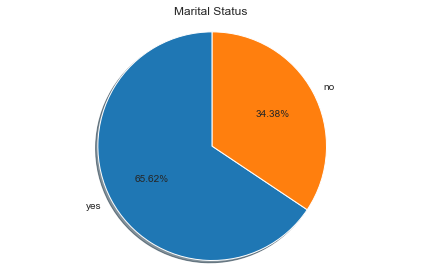

In [48]:
labels = ['yes', 'no']
ever_marriedCount= data['ever_married'].value_counts()
yesperc='{:.2f}'.format(ever_marriedCount["Yes"]/data['ever_married'].count()*100)
noperc='{:.2f}'.format(ever_marriedCount["No"]/data['ever_married'].count()*100)


sizes = [yesperc,noperc]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title("Marital Status ")
ax1.axis('equal')  
plt.tight_layout()
plt.show()

About 65.62% of the patients were ever married, and 34.38% had never been in a marriage.

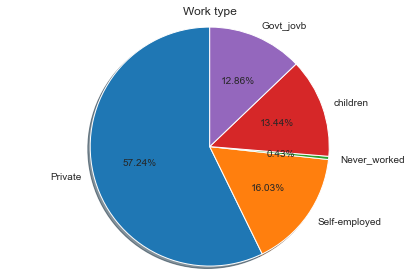

In [49]:
labels = ['Private', 'Self-employed',"Never_worked","children","Govt_jovb"]
occupationCount= data['work_type'].value_counts()
perc1='{:.2f}'.format(occupationCount["Private"]/data['work_type'].count()*100)
perc2='{:.2f}'.format(occupationCount["Self-employed"]/data['work_type'].count()*100)
perc3='{:.2f}'.format(occupationCount["Never_worked"]/data['work_type'].count()*100)
perc4='{:.2f}'.format(occupationCount["children"]/data['work_type'].count()*100)
perc5='{:.2f}'.format(occupationCount["Govt_job"]/data['work_type'].count()*100)

sizes = [perc1,perc2,perc3,perc4,perc5]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title("Work type")
ax1.axis('equal')  
plt.tight_layout()
plt.show()

The majority of the patients are working in a private company

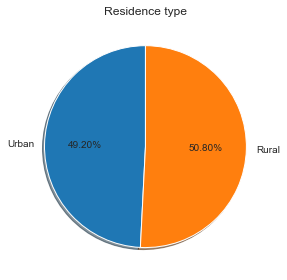

In [50]:

labels = ['Urban','Rural']
residenceCount= data['Residence_type'].value_counts()
perc1='{:.2f}'.format(residenceCount["Rural"]/data['Residence_type'].count()*100)
perc2='{:.2f}'.format(residenceCount["Urban"]/data['Residence_type'].count()*100)


sizes = [perc1,perc2]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title("Residence type")

plt.tight_layout()
plt.show()

About 50.80% of the patients live in urban neighborhoods. While the rest live in a rural neighborhood.

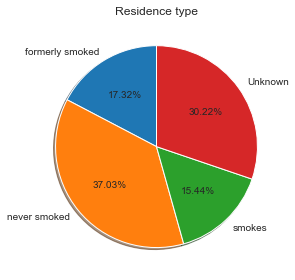

In [51]:
labels = ["formerly smoked","never smoked","smokes","Unknown"]
residenceCount= data['smoking_status'].value_counts()
perc1='{:.2f}'.format(residenceCount["formerly smoked"]/data['smoking_status'].count()*100)
perc2='{:.2f}'.format(residenceCount["never smoked"]/data['smoking_status'].count()*100)
perc3='{:.2f}'.format(residenceCount["smokes"]/data['smoking_status'].count()*100)
perc4='{:.2f}'.format(residenceCount["Unknown"]/data['smoking_status'].count()*100)


sizes = [perc1,perc2,perc3,perc4]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title("Residence type")

plt.tight_layout()
plt.show()

The majority of the patients (37.03%) are non-smokers. The 'unknown' means the data is not available for that patient.

## Step1:  Exploratory Data Analysis (EDA)

### a) Preprocessing

In [52]:
#total number of rows :5110 
#tootal number of rows:12 (data has 11 attributes and one outcome)
data.shape

(5110, 12)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

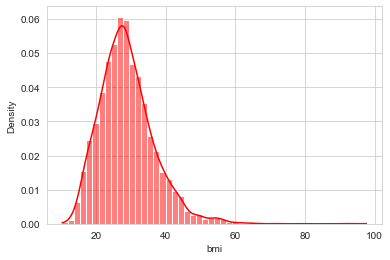

In [53]:
#distribution graphs 
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.histplot(data['bmi'], color="red", label="100% Equities", kde=True, stat="density", linewidth=1,bins=50)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

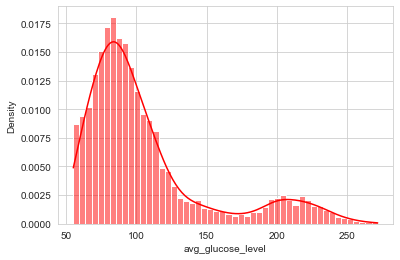

In [54]:

sns.histplot(data['avg_glucose_level'], color="red", label="100% Equities", kde=True, stat="density", linewidth=1,bins=50)

## Step2: Preprocessing & Feature Engineering 

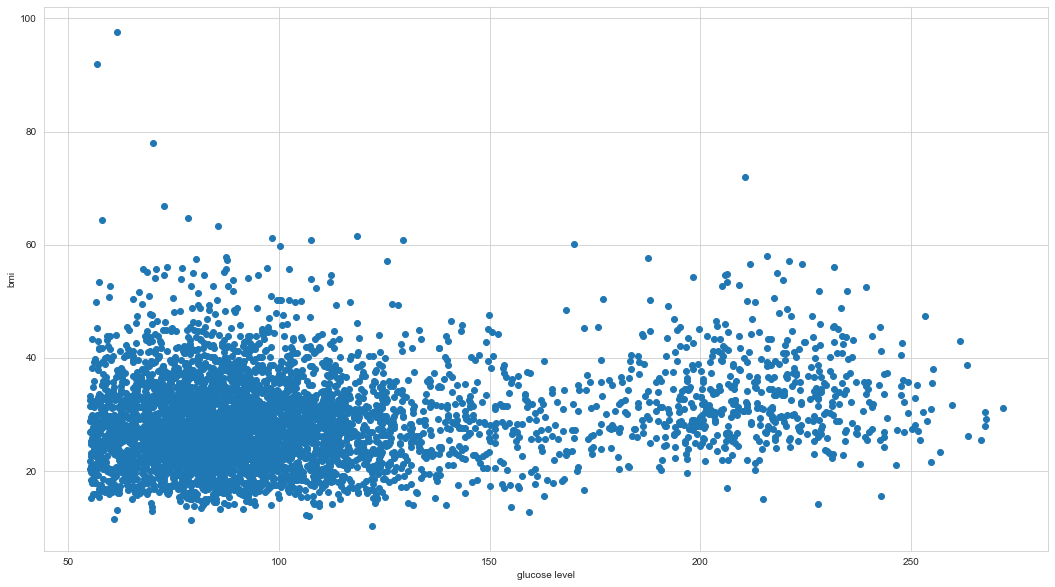

In [55]:

fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(data['avg_glucose_level'], data['bmi'])
 
# x-axis label
ax.set_xlabel('glucose level')
 
# y-axis label
ax.set_ylabel('bmi')
plt.show()

In [56]:

def remove_outlier(df_in, col_name):
    if df_in[col_name].isnull().values.any() :
        Q1=np.nanpercentile(data[col_name], 25,
                   interpolation = 'midpoint')
        Q3=np.nanpercentile(data[col_name], 75,
                   interpolation = 'midpoint')
    else :
        Q1 = np.percentile(data[col_name], 25,
                   interpolation = 'midpoint')
        Q3 = np.percentile(data[col_name], 75,
                   interpolation = 'midpoint')
    iqr = Q3-Q1 #Interquartile range
    fence_low  = Q1-1.5*iqr
    fence_high = Q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
   
    


In [57]:
data1=remove_outlier(data,"avg_glucose_level")
data = data1.reset_index(drop=True)
data.shape

(4483, 12)

In [58]:
#data2=remove_outlier(data1,"bmi")
#data = data2.reset_index(drop=True)
#data.shape

In [59]:
print("Özellik Bazlı Kayıp Değerlerin Sayısı:")
print(data.isnull().sum())

Özellik Bazlı Kayıp Değerlerin Sayısı:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64


In [60]:
#bmi attribute has 140 missing value
#can t get rid of rows who have these missing data because it will be 
#big loss of important data 
#This method fills each missing row with the value of the nearest one above it.
data['bmi'].fillna(method='ffill', inplace=True)

In [61]:
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


there is missing data in gender column defined as "Other" 
Same for people with an "Unknown" smoking status, as unknown is the very definition of a missing value.

In [62]:
#The column ‘id’ doesn’t provide any useful context. So, we’ll drop it.
data = data.drop('id',axis=1)

In [63]:
(data["gender"]=="Other").sum()

1

In [64]:
data.loc[data['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2702,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [65]:
#because we just find one row which has other as gender just dropped that one.
data=data.drop(3116,axis=0)
data=data.drop(2702,axis=0)
data.iloc[3114:3118,:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3115,Female,65.0,0,0,No,Govt_job,Urban,60.70,31.3,never smoked,0
3117,Female,25.0,0,0,Yes,Private,Rural,79.94,36.6,Unknown,0
3118,Male,53.0,0,0,Yes,Govt_job,Rural,83.68,26.7,Unknown,0
3119,Female,50.0,0,0,Yes,Self-employed,Urban,69.92,18.7,formerly smoked,0


In [66]:
data = data.reset_index(drop=True)
data.iloc[3114:3118,:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3114,Female,65.0,0,0,No,Govt_job,Urban,60.70,31.3,never smoked,0
3115,Female,25.0,0,0,Yes,Private,Rural,79.94,36.6,Unknown,0
3116,Male,53.0,0,0,Yes,Govt_job,Rural,83.68,26.7,Unknown,0
3117,Female,50.0,0,0,Yes,Self-employed,Urban,69.92,18.7,formerly smoked,0


In [67]:
#there is missing data in smoking_status column defined as unknown 
#since these data is unknown so 50% could be smoker and 50% may be not 
#so i replaced unknown with probably smokes so later i can give it order
#while encoding data

data['smoking_status']=data["smoking_status"].replace("Unknown", "probably smokes")
data['smoking_status'].value_counts()

never smoked       1632
probably smokes    1441
formerly smoked     723
smokes              685
Name: smoking_status, dtype: int64

In [68]:
#we need to  convert categorical data into integer format so that
# the data with converted categorical values can be provided to the
# models to give and improve the predictions
#obj_df = data.select_dtypes(include=['object']).copy()
dataclean = data.copy()

In [69]:
dataclean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,22.8,probably smokes,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,probably smokes,1


In [70]:
#encoding (sıralama)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#symmetric
dataclean['gender']=le.fit_transform(dataclean['gender'])
dataclean['ever_married']=le.fit_transform(dataclean['ever_married'])
dataclean['work_type']=le.fit_transform(dataclean['work_type'])
dataclean['Residence_type']=le.fit_transform(dataclean['Residence_type'])
#obj_df['smoking_status']=le.fit_transform(obj_df['smoking_status'])

In [71]:
dataclean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,80.0,0,1,1,2,0,105.92,32.5,never smoked,1
1,1,74.0,1,1,1,2,0,70.09,27.4,never smoked,1
2,0,69.0,0,0,0,2,1,94.39,22.8,never smoked,1
3,0,59.0,0,0,1,2,0,76.15,22.8,probably smokes,1
4,0,78.0,0,0,1,2,1,58.57,24.2,probably smokes,1


people who've never smoked are probably less likely to have a stroke than those who did smoke in the past, which in turn are less likely to have a stroke than those who currently smoke, we can say there is some inherent order to these three categories.
Thus, it would be meaningful to encode them with 0, 1, 2 & 3.
never smoked   =>0
probably smokes=>1
formerly smoked=>2
smoked         =>3

In [72]:
#asymmetric
smoking_mapper={"never smoked":0,"probably smokes":1,"formerly smoked":2,"smokes":3}

In [73]:
cleanup_nums = {"smoking_status": {"never smoked":0,"probably smokes":1,"formerly smoked":2,"smokes":3}}

In [74]:
dataclean = dataclean.replace(cleanup_nums)
dataclean.iloc[3114:3118,:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3114,0,65.0,0,0,0,0,1,60.70,31.3,0,0
3115,0,25.0,0,0,1,2,0,79.94,36.6,1,0
3116,1,53.0,0,0,1,0,0,83.68,26.7,1,0
3117,0,50.0,0,0,1,3,1,69.92,18.7,2,0


In [75]:
data=dataclean.copy()


### b) Feature Engineering

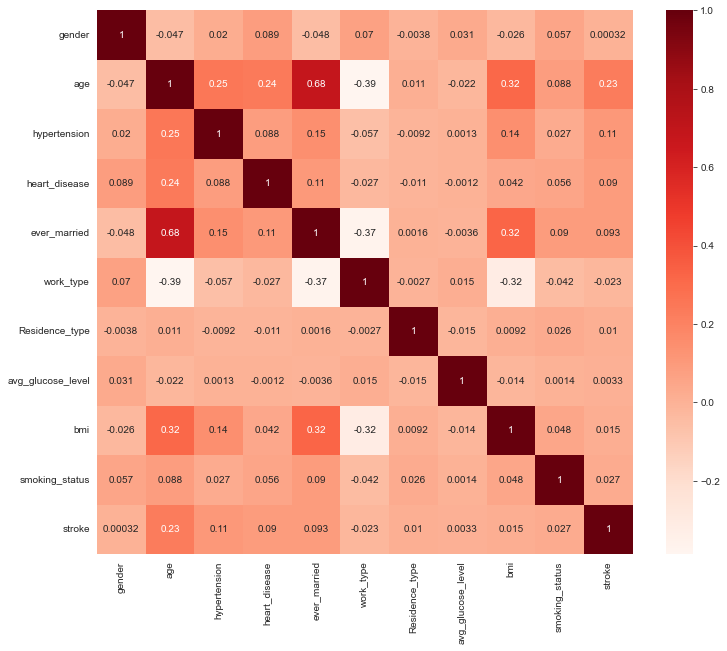

In [76]:
#Using Pearson Correlation
#Determine which features are the most valuable
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
# Discretize with respective equal-width bin
dataclean['age_binned'] = pd.cut(dataclean['age'], np.arange(0, 91, 5))
dataclean['avg_glucose_level_binned'] = pd.cut(dataclean['avg_glucose_level'], np.arange(0, 301, 20))
dataclean['bmi_binned'] = pd.cut(dataclean['bmi'], np.arange(0, 101, 5))

In [78]:

def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    df_pct = dataclean.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=1);


In [79]:
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Get the count of records by column and stroke
    df_breakdown = dataclean.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    df_total = dataclean.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    df_pct = df_breakdown / df_total * 100
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width);

<AxesSubplot:xlabel='Residence_type'>

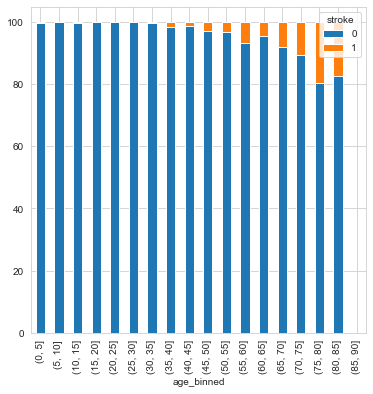

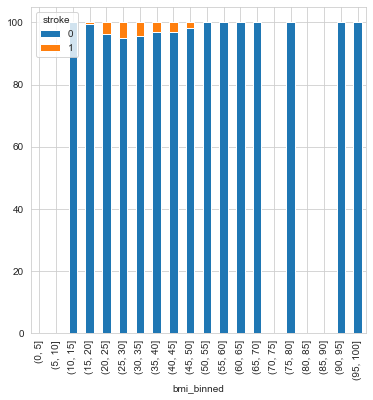

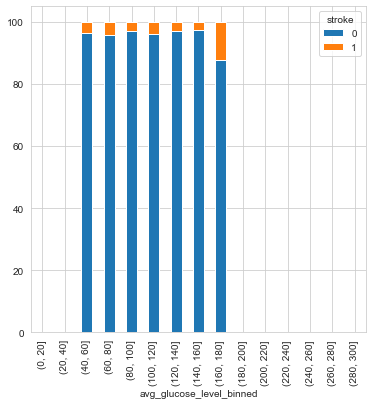

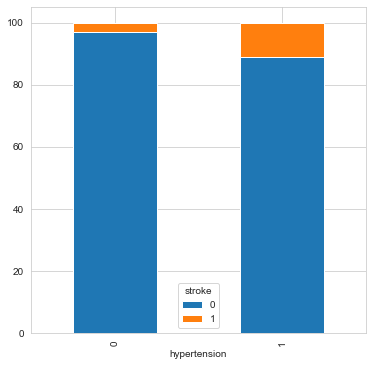

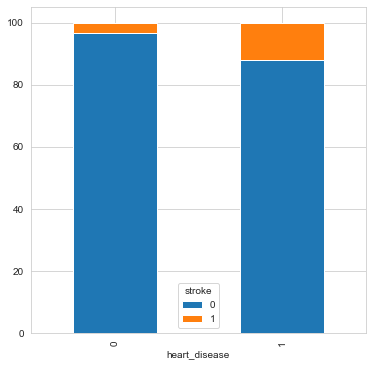

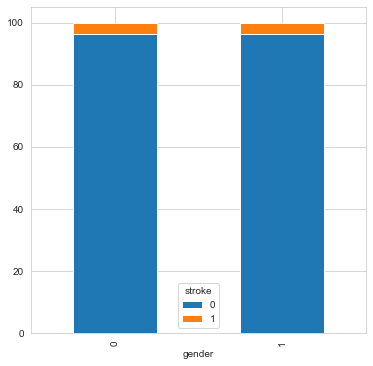

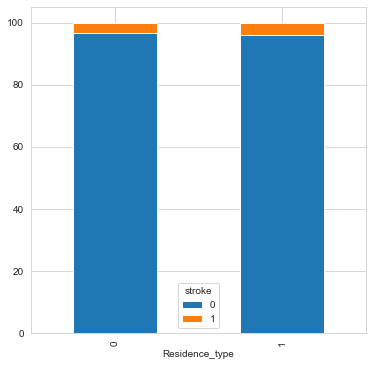

In [80]:
get_100_percent_stacked_bar_chart('age_binned')
get_100_percent_stacked_bar_chart('bmi_binned')
get_100_percent_stacked_bar_chart('avg_glucose_level_binned')
get_100_percent_stacked_bar_chart('hypertension')
get_100_percent_stacked_bar_chart('heart_disease')
get_100_percent_stacked_bar_chart('gender')
get_100_percent_stacked_bar_chart('Residence_type')

- The risk of experiencing a stroke increased as patient’s age advanced.
=>Older patient was more likely to suffer a stroke than a younger patient.
- Percentage of patient who had BMI between 25 and 35 was the highest to suffer a stroke than patients from other groups.
=>Higher BMI does not increase the stroke risk.
- stroke incidence occurred to some patients regardless of the average glucose level measured after meal. Although there was no stroke incidence reported on the last two columns on the right, these columns were represented by only 3 patients, i.e. not significant. Nevertheless, higher proportion of patient who had average glucose level measured after meal of more than 150mg/dL (milligrams per decilitre) suffered a stroke. This observation can be explained by the presence of diabetes. Diabetes was present in patient who had reading of more than 200mg/dL. Pre-diabetes was also considered in patient if the reading was between 140–199mg/dL.
=> Diabetes is one of the risk factors for stroke occurrence and prediabetes patients have an increased risk of stroke.
Higher proportion of patients who suffered from hypertension or heart disease experienced a stroke, all else being equal.
- Regardless of patient’s gender, and where they stayed, they have the same likelihood to experience stroke.

## Step3:  Choose Data Mining Algorithms & Explain

a) i think the best data mining approaches for this dataset is classification because :
- this dataset has 2 possible outcomes: whether the patient has stroke or not => binary classified
- the objective is to find which class a new object belongs to form the set of predefined classes.Means the new patient will be classified whether he has stroke or not according to his attributes and the model that trained according to predifined datase
- since it's dataset of healthcare problem the error  probability should be low 

- from classification techniques most used i am going to use random forest  and Logistic regression algorithms

In [81]:
# cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import KFold,cross_val_score

X = data.drop('stroke',axis=1)
Y = data.stroke

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestClassifier()    
KNR = KNeighborsRegressor()

kf = KFold(n_splits=10,shuffle=True,random_state=10)

print(f" Linear Regression : {np.sqrt(-cross_val_score(LR,X,Y,cv=kf,scoring='neg_mean_squared_error').mean())}")
print(f" Decision Tree : {np.sqrt(-cross_val_score(DTR,X,Y,cv=kf,scoring='neg_mean_squared_error').mean())}")
print(f" Random Forest : {np.sqrt(-cross_val_score(RFR,X,Y,cv=kf,scoring='neg_mean_squared_error').mean())}")

print(f" KNeighbors : {np.sqrt(-cross_val_score(KNR,X,Y,cv=kf,scoring='neg_mean_squared_error').mean())}")

 Linear Regression : 0.1825241320360032
 Decision Tree : 0.28146611610422095
 Random Forest : 0.19304750741955615
 KNeighbors : 0.19856659019414608


b)
### Pros

Random Forest
-  Random forest can decorrelate trees. It picks the training sample and gives each tree a subset of the features(suppose training data was [1,2,3,4,5,6], so one tree will get subset of training data [1,2,3,2,6,6]. Note that size of training data remains same, both datas have length 6 and that feature ‘2’ and feature ‘6’ are repeated in the randomly sampled training data given to one tree. Each tree predicts according to the features it has. In this case tree 1 only has access to features 1,2,3 and 6 so it can predict based on these features. Some other tree will have access to features 1,4,5 say so it will predict according to those features. If features are highly correlated then that problem can be tackled in random forest.
- Good Performance on Imbalanced datasets : It can also handle errors in imbalanced data (one class is majority and other class is minority)
-  Reduced error: Random forest is an ensemble of decision trees. For predicting the outcome of a particular row, random forest takes inputs from all the trees and then predicts the outcome. This ensures that the individual errors of trees are minimized and overall variance and error is reduced.
- Handling of huge amount of data: It can handle huge amount of data with higher dimensionality of variables.
- Good handling of missing data: It can handle missing data very well. So if there is large amount of missing data in your model, it will give good results.
- Little impact of outliers: As the final outcome is taken by consulting many decision trees so certain data points which are outliers will not have a very big impact on Random Forest.
- No problem of overfitting: In Random forest considers only a subset of features, and the final outcome depends on all the trees. So there is more generalization and less overfitting.
- Useful to extract feature importance (we can use it for feature selection)

Logistic Regression :
- very easy to understand.
- It requires less training.
- Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.
- It makes no assumptions about distributions of classes in feature space.
- Logistic regression is easier to implement, interpret, and very efficient to train.

### Cons:

Random Forest
- Features need to have some predictive power else they won’t work.
- Predictions of the trees need to be uncorrelated.
- Appears as Black Box: It is tough to know what is happening. You can at best try different parameters and random seeds to change the outcomes and performance.

Logistic Regression:
- Sometimes Lot of Feature Engineering Is required
- If the independent features are correlated it may affect performance.
- It is often quite prone to noise and overfitting.
- If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.
- Non-linear problems can’t be solved with logistic regression because it has a linear decision surface. Linearly separable data is rarely found in real-world scenarios.
- It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.
- In Linear Regression independent and dependent variables are related linearly. But Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).


c)

 #### A confusion matrix
- A confusion matrix is a n x n matrix (where n is the number of labels) used to describe the performance of a classification model. Each row in the confusion matrix represents an actual class whereas each column represents a predicted class.
#### Precision
- Precision is defined as the ratio of True Positives count to total True Positive count made by the model.
- Precision =  TP/(TP+FP)
#### Recall
- Recall is defined as the ratio of True Positives count to the total Actual Positive count.
- Recall = TP/(TP+FN)
- Recall is also called “True Positive Rate” or “sensitivity”.

- in our case  having high recall and low precision is prefered

## Step4:  Algorithms, Implementation and Performance Comparison

#### Random Forest

In [111]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [112]:
#Separating input and target data
X = data.drop(['stroke'],axis=1)
Y = data['stroke']
#Printing shapes of input and target
print('X Shape', X.shape)
print('Y Shape',Y.shape)
from collections import Counter
counter = Counter(Y)
print(counter)

X Shape (4481, 10)
Y Shape (4481,)
Counter({0: 4316, 1: 165})


In [113]:
# the number of 0’s and 1’s in stroke ‘column’.
data['stroke'].value_counts()

0    4316
1     165
Name: stroke, dtype: int64

there is a class imbalance problem here as there are 4314 cases of stroke but only 165 cases of no-stroke. 


In [114]:
#handle class imbalance problem
smote = SMOTE(sampling_strategy=0.3)
X, Y = smote.fit_resample(X, Y)

In [115]:
print('X Shape', X.shape)
print('Y Shape',Y.shape)

X Shape (5610, 10)
Y Shape (5610,)


In [116]:
from collections import Counter

counter = Counter(Y)
print(counter)

Counter({0: 4316, 1: 1294})


In [117]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model_rfc = RandomForestClassifier()
model_rfc.fit(x_train,y_train)
prediction_rfc=model_rfc.predict(x_test)

print(confusion_matrix(y_test, prediction_rfc))
print(classification_report(y_test, prediction_rfc))

[[850  21]
 [ 40 211]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       871
           1       0.91      0.84      0.87       251

    accuracy                           0.95      1122
   macro avg       0.93      0.91      0.92      1122
weighted avg       0.94      0.95      0.94      1122



In [119]:
#model’s score on test data. 
#the model correctly predicts 94% of the target values.
 #model.score(x_test,y_test)
roc_rfc_1 = roc_auc_score(y_test, prediction_rfc) 
roc_rfc_1

0.9082636160295673

#### Logistic regression

In [120]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

In [121]:
predictions = logmodel.predict(x_test)

In [122]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       871
           1       0.67      0.53      0.59       251

    accuracy                           0.84      1122
   macro avg       0.77      0.73      0.75      1122
weighted avg       0.83      0.84      0.83      1122



In [123]:
logmodel.score(x_test, y_test)
roc_lr_1 = roc_auc_score(y_test, predictions) 
roc_lr_1

0.729044785267655

In [124]:
from sklearn.metrics import confusion_matrix
#sns.heatmap(confusion_matrix(y_test,predictions), annot= True, cmap = 'viridis', fmt="2")
#plt.title('Confusion Matrix')
#plt.show()

b)
The most important hyper-parameters of a Random Forest that can be tuned are:
- The Nº of Decision Trees in the forest (in Scikit-learn this parameter is called n_estimators):increasing the number of trees generally reduces model error at the cost of a higher training time

- The criteria with which to split on each node (Gini or Entropy for a classification task)

- The maximum depth of the individual trees: Increasing the Depth of individual trees increases the possible number of feature/value combinations that are taken into account, but it may cause overfitting the training data, however, as in Random Forests we have many individual trees, this is not such a big problem.

- Number of random features to include at each node for splitting.

- The size of the bootstrapped dataset to train each Decision Tree with.In Sklearn this is controlled with the max_samples hyperparameter, which by default takes the size of the initial data set.

The main hyperparameters we may tune in logistic regression are:
- Solver is the algorithm to use in the optimization problem. The choices are {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’.

- Penalty (or regularization) intends to reduce model generalization error, and is meant to disincentivize and regulate overfitting. Technique discourages learning a more complex model, so as to avoid the risk of overfitting. The choices are: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’.

- C (or regularization strength) must be a positive float. Regularization strength works with the penalty to regulate overfitting. Smaller values specify stronger regularization and high value tells the model to give high weight to the training data.

#### Logistic regression improvment

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(x_train)
X_test_scaled = sc.transform (x_test)

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'max_iter': list(range(100,800,100)), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log1 = LogisticRegression()
logmodel1 = RandomizedSearchCV(log1, param_grid_lr, cv = 5)
logmodel1.fit(X_train_scaled, y_train)
logprediction1 = logmodel1.best_estimator_.predict(X_test_scaled)

print("Tuned Logistic Regression Parameters: {}".format(logmodel1.best_params_)) 
print("Best score is {}".format(logmodel1.best_score_))

print(confusion_matrix(y_test,logprediction1))
print(classification_report(y_test,logprediction1))

Tuned Logistic Regression Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 600, 'C': 0.1}
Best score is 0.8400148478099482
[[806  65]
 [118 133]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       871
           1       0.67      0.53      0.59       251

    accuracy                           0.84      1122
   macro avg       0.77      0.73      0.75      1122
weighted avg       0.83      0.84      0.83      1122



In [127]:
roc_lr_2 = roc_auc_score(y_test, logprediction1) 
roc_lr_2

0.7276268062080038

Hyperparameter tuning did not improve the performance of the logistic regression model.

#### Random Forest improvment

In [128]:
param_grid_rfc = {'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [130, 180, 230]}
rfc_2 =RandomForestClassifier()
rfc_2_model = RandomizedSearchCV(rfc_2, param_grid_rfc, cv = 5)
rfc_2_model.fit(x_train, y_train)
prediction_rfc_2 = rfc_2_model.best_estimator_.predict(x_test)

print("Tuned RFC Parameters: {}".format(rfc_2_model.best_params_)) 
print("Best score is {}".format(rfc_2_model.best_score_))

print(confusion_matrix(y_test, prediction_rfc_2))
print(classification_report(y_test,prediction_rfc_2))

Tuned RFC Parameters: {'n_estimators': 230, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Best score is 0.9356074318502904
[[848  23]
 [ 34 217]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       871
           1       0.90      0.86      0.88       251

    accuracy                           0.95      1122
   macro avg       0.93      0.92      0.93      1122
weighted avg       0.95      0.95      0.95      1122



In [129]:
roc_rfc_2 = roc_auc_score(y_test, prediction_rfc_2) 
roc_rfc_2

0.9190677016389094

Hyperparameter tuning improved the performance of the random forest classifier.

Hyperparameter tuning did not improve the performance of the logistic regression model.
=> random forest classifier performs better than logistic regression because it gives higher score and improve the performance using Hyperparameter while logistic regression does'nt improve at all

## Step5:  Further Performance Improvement 
i propose other improvement technique called gradient boosting classifier

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_1 = GradientBoostingClassifier()
gbc_1.fit(x_train, y_train)
prediction_gbc_1 = gbc_1.predict(x_test)

print(confusion_matrix(y_test, prediction_gbc_1))
print(classification_report(y_test,prediction_gbc_1))

[[835  36]
 [ 85 166]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       871
           1       0.82      0.66      0.73       251

    accuracy                           0.89      1122
   macro avg       0.86      0.81      0.83      1122
weighted avg       0.89      0.89      0.89      1122



In [143]:
roc_gbc_1 = roc_auc_score(y_test, prediction_gbc_1) 
roc_gbc_1

0.8100113895737372

In [144]:
param_grid_gbc = {'n_estimators':[10, 100, 1000], 'learning_rate': [0.001, 0.01, 0.1], 'subsample': [0.5, 0.7, 1.0], 'max_depth': [3, 7, 9]}
gbc_2 = GradientBoostingClassifier()
gbc_2_model = RandomizedSearchCV(gbc_2, param_grid_gbc, cv = 5)
gbc_2_model.fit(x_train, y_train)
prediction_gbc_2 = gbc_2_model.best_estimator_.predict(x_test)

print("Tuned GBC Parameters: {}".format(gbc_2_model.best_params_)) 
print("Best score is {}".format(gbc_2_model.best_score_))

print(confusion_matrix(y_test, prediction_gbc_2))
print(classification_report(y_test,prediction_gbc_2))

Tuned GBC Parameters: {'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01}
Best score is 0.9396178302830765
[[857  14]
 [ 43 208]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       871
           1       0.94      0.83      0.88       251

    accuracy                           0.95      1122
   macro avg       0.94      0.91      0.92      1122
weighted avg       0.95      0.95      0.95      1122



In [145]:
roc_gbc_2 = roc_auc_score(y_test, prediction_gbc_2) 
roc_gbc_2

0.9063058901020488

## Step6: Your Comments
Both, random forest classifier and gradient boosting classifier performed very well.Hyperparameter tuning further improved the performance of both models, with random forest classifier providing the best performance of predicting stroke.

while Trying to improve performance of the random forest model using hyperparametertuning the process take a long time to be done

Hyperparameter tuning using RandomSearchCV resulted:
- in better performance for Random Forest Classifierand Gradient Boosting classifier
- same performance for Logistic Regression
